In [1]:
import seml
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import os

In [2]:
output_dir = "figures"

In [3]:
#models = ["WOT", "Moscot", "Moscot_online", "Moscot_r1000", "Moscot_r200", "Moscot_r50"]
#n_cells = [2048+8192, 4096+16384, 8192+32768, 16384+65536, 32768+131072]

In [6]:
results = seml.get_results('cpu_time_benchmark', to_data_frame=True)

  0%|          | 0/256 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

In [12]:
dic = {}
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/1024_true_coupling.h5ad"] = 512+1024
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/2048_true_coupling.h5ad"] = 1024+2048
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/4096_true_coupling.h5ad"] = 2048+4096
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/8192_true_coupling.h5ad"] = 4096+8192
dic["/home/icb/dominik.klein/data/adatas_tedsim_benchmark/adatas/16384_true_coupling.h5ad"] = 8192+16384

In [13]:
import seaborn as sns
sns.set_style("whitegrid", {'xtick.direction': 'out', 'xtick.major.size': 5.0, 'xtick.minor.size': 5.0,
    'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 
                           'font.family': ['DejaVu Sans'], 'font.scale': 1})
palette = 'deep'

In [14]:
"""labels_dict = {}
['Moscot', 'Moscot_online', 'Moscot_r200', 'Moscot_r50', 'WOT']
labels_dict["Moscot"] = "moscot"
labels_dict["Moscot_online"] = "moscot Online"
labels_dict["Moscot_r1000"] = "moscot, R=1000"
labels_dict["Moscot_r200"] = "moscot, R=200"
labels_dict["Moscot_r50"] = "moscot, R=50"
labels_dict["WOT"] = "WOT"""

'labels_dict = {}\n[\'Moscot\', \'Moscot_online\', \'Moscot_r200\', \'Moscot_r50\', \'WOT\']\nlabels_dict["Moscot"] = "moscot"\nlabels_dict["Moscot_online"] = "moscot Online"\nlabels_dict["Moscot_r1000"] = "moscot, R=1000"\nlabels_dict["Moscot_r200"] = "moscot, R=200"\nlabels_dict["Moscot_r50"] = "moscot, R=50"\nlabels_dict["WOT"] = "WOT'

In [18]:
results.columns

Index(['_id', 'config.overwrite', 'config.db_collection',
       'config.benchmark_mode', 'config.dirs', 'config.epsilon', 'config.key',
       'config.lambda_1', 'config.lambda_2', 'config.local_pca',
       'config.max_iterations', 'config.model', 'config.n_val_samples',
       'config.run', 'config.seed', 'config.threshold', 'config.validate_ot',
       'result.benchmark_result', 'result.error', 'result.entropy',
       'config.gamma', 'config.jit', 'config.online', 'config.rank'],
      dtype='object')

In [23]:
results["true_couplings_dir"] = results.apply(lambda x: x["config.dirs"][1], axis=1) 
results["n_cells"] = results["true_couplings_dir"].map(dic)


In [56]:
def adapt_model(x):
    if x["config.model"] == "WOT":
        return "WOT"
    rank = x["config.rank"]
    gamma = x["config.gamma"]
    if x["config.online"]:
        if np.isnan(rank):
            return "moscot_online"
        return f"moscot_online_{rank}_{gamma}"
    if np.isnan(rank):
        return "moscot"
    return f"moscot_{rank}_{gamma}"
    
results["model_adapted"] = results.apply(lambda x: adapt_model(x), axis=1)

/tmp/ipykernel_50053/1604612892.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


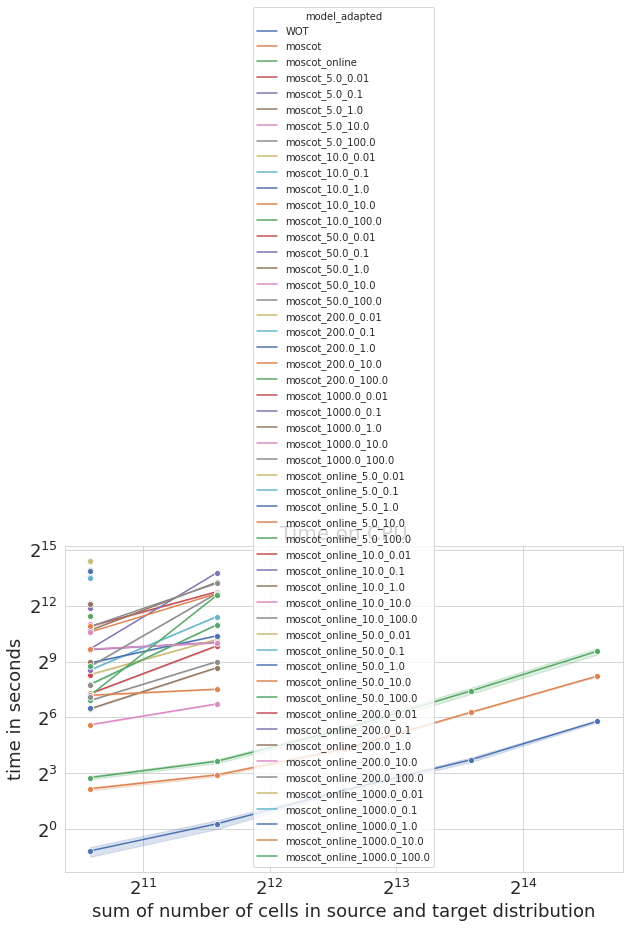

In [57]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='result.benchmark_result', hue="model_adapted", marker='o', 
                     data=results, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('time in seconds', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Time on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()

#plt.savefig(os.path.join("figures", "f_cpu_time_full_rank.png"), dpi=300)

/tmp/ipykernel_50053/1034393437.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


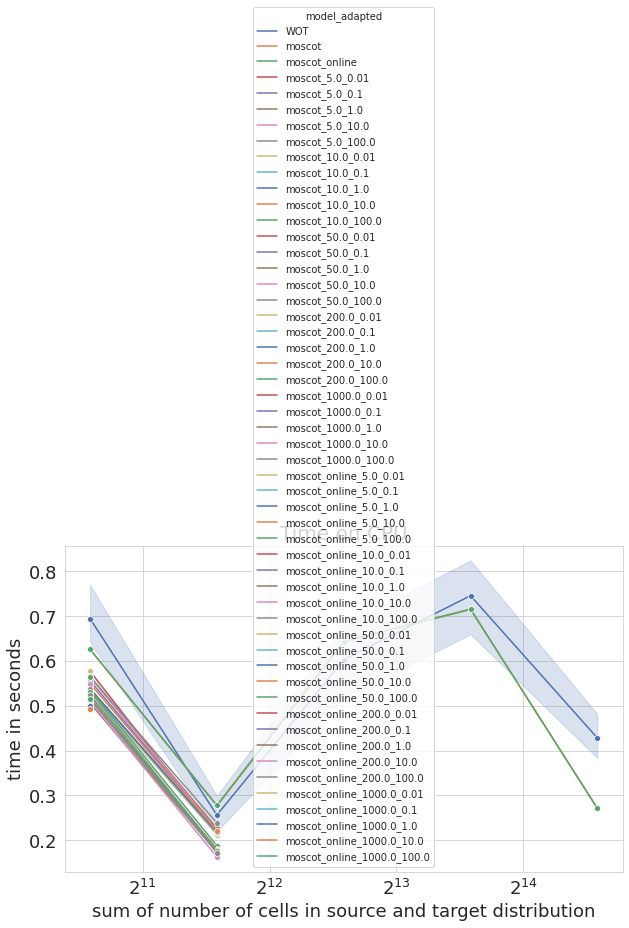

In [68]:
rows = 1
cols = 1
size = 5


fig, axs = plt.subplots(rows, cols, figsize=(2*cols*(size),rows*(size+1)))
pl = sns.lineplot(x='n_cells', y='error_adapted', hue="model_adapted", marker='o', 
                     data=results, ax=axs, palette=palette, markers=True)
plt.xscale('log', basex=2)
handles, _labels = axs.get_legend_handles_labels()

#labels = [*map(labels_dict.get, _labels)]

#axs.legend(handles, labels, frameon=True, fontsize = 16, ncol=1, loc=(1.05,0), 
#            handlelength=1, handletextpad=0.6, borderaxespad=.4, columnspacing=.6)

axs.set_ylabel('time in seconds', fontsize=18)

axs.set_xlabel('sum of number of cells in source and target distribution', fontsize=18)
axs.tick_params(axis='both', which='major', labelsize=18)
axs.set_title("Time on CPU", fontsize=20)
_, xlabels = plt.xticks()




plt.tight_layout()

In [54]:
results

,_id,config.overwrite,config.db_collection,config.benchmark_mode,config.dirs,config.epsilon,config.key,config.lambda_1,config.lambda_2,config.local_pca,...,result.benchmark_result,result.error,result.entropy,config.gamma,config.jit,config.online,config.rank,true_couplings_dir,n_cells,model_adapted
0,1,1,cpu_time_benchmark,time,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,0.288071,0.655312,12.795849,NaN,NaN,NaN,NaN,/home/icb/dominik.klein/data/adatas_tedsim_ben...,1536,WOT
1,2,2,cpu_time_benchmark,time,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,0.816258,0.283177,14.171709,NaN,NaN,NaN,NaN,/home/icb/dominik.klein/data/adatas_tedsim_ben...,3072,WOT
2,3,3,cpu_time_benchmark,time,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,4.009673,0.654457,15.556276,NaN,NaN,NaN,NaN,/home/icb/dominik.klein/data/adatas_tedsim_ben...,6144,WOT
3,4,4,cpu_time_benchmark,time,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,12.923813,0.871823,16.993868,NaN,NaN,NaN,NaN,/home/icb/dominik.klein/data/adatas_tedsim_ben...,12288,WOT
4,5,5,cpu_time_benchmark,time,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,57.690698,0.441623,18.435266,NaN,NaN,NaN,NaN,/home/icb/dominik.klein/data/adatas_tedsim_ben...,24576,WOT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,259,259,cpu_time_benchmark,time,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,183.815621,[0.22024602593442072],[12.379254651299586],10.00,False,False,10.0,/home/icb/dominik.klein/data/adatas_tedsim_ben...,3072,moscot_10.0
252,260,260,cpu_time_benchmark,time,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,2029.618436,[0.1873316787127105],[12.449526336819343],100.00,False,False,10.0,/home/icb/dominik.klein/data/adatas_tedsim_ben...,3072,moscot_10.0
253,261,261,cpu_time_benchmark,time,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,6912.193137,[0.1790087405832268],[11.801918040985704],0.01,False,False,50.0,/home/icb/dominik.klein/data/adatas_tedsim_ben...,3072,moscot_50.0
254,264,264,cpu_time_benchmark,time,[/home/icb/dominik.klein/data/adatas_tedsim_be...,0.5,node_depth,2,10,30,...,1047.919750,[0.16270867303761602],[10.853386454951071],10.00,False,False,50.0,/home/icb/dominik.klein/data/adatas_tedsim_ben...,3072,moscot_50.0


In [65]:
def adapt_error(x):
    if isinstance(x['result.error'], np.ndarray):
        return x['result.error'][0]
    return x['result.error']

results["error_adapted"] = results.apply(lambda x: adapt_error(x), axis=1)

In [66]:
results["error_adapted"][255]

0.177940753040033